In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
names_by_year = {}
for year in range(1900, 2000, 5):
    names_by_year[year] = pd.read_csv(
        '/home/daniil/Projects/learning_python/lesson_4.2/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [35]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

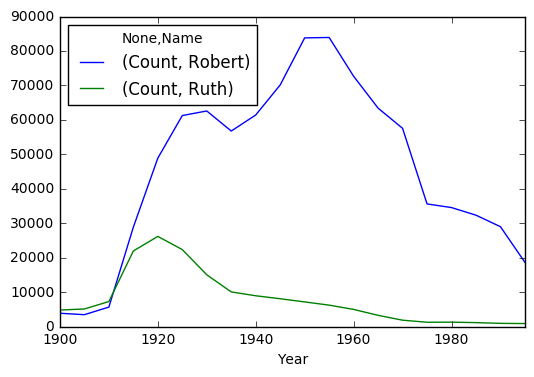

In [26]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

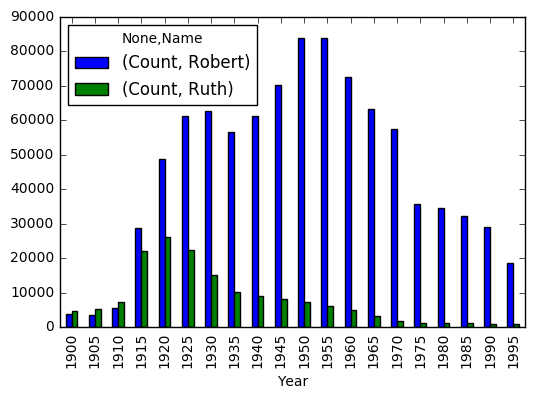

In [6]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [74]:
nsw_R = pd.read_csv(
        '/home/daniil/Projects/learning_python/lesson_4.2/names/yob1950.txt',
        names=['Name','Gender','Count']
    )
nsw_R = nsw_R[nsw_R.Name.str.startswith('R')].set_index('Name')

In [5]:
# Получается жуткая круговая диаграмма, так как имен, начинающихся на 'R', очень много
nsw_R.plot.pie(y='Count')

In [68]:
def consonants(row):
    vowels = 0
    consonants = 0
    for letter in row.Name:
        if letter.lower() in 'aeiouy':
            vowels += 1
        else:
            consonants += 1
            row.Name = consonants
    return row

names_by_century = names_all.groupby('Name').sum().sort_values(by='Count',
                                                               ascending=False).reset_index().apply(consonants, axis=1)

In [ ]:
names_by_century.plot.scatter(x='Count', y='Name')